## Modulo 14 - Tarefa 01 - Scripting
. Crie um jupyter notebook com os imports necessários e um código para gerar os gráficos referentes a base de dados de março, abril, maio, junho e dezembro (numa célula só ou em várias).

. Como que você poderia fazer para deixar isso mais automatizado? Descreva na última célula do jupyter notebook o que ajudaria na hora de gerar novos gráficos pros meses/anos seguintes.

/Users/tsumano/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


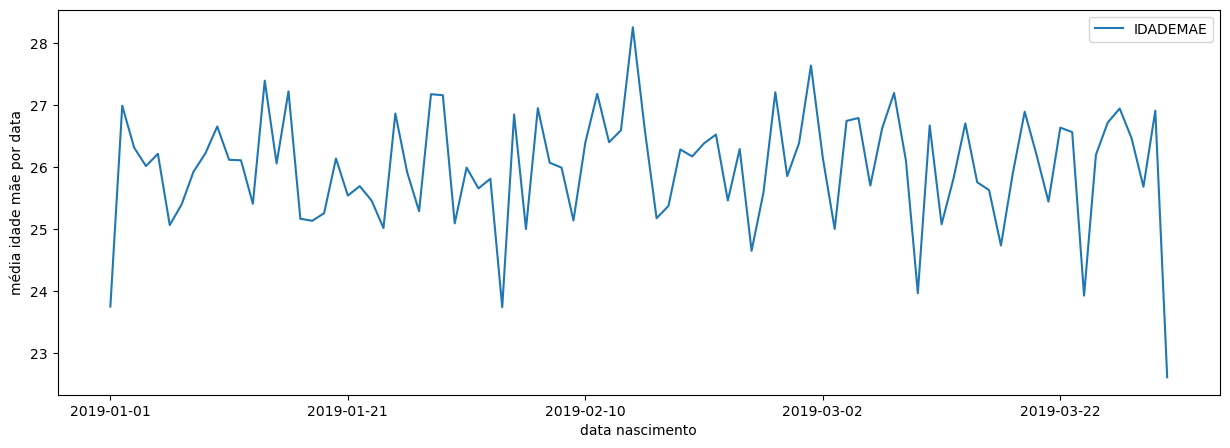

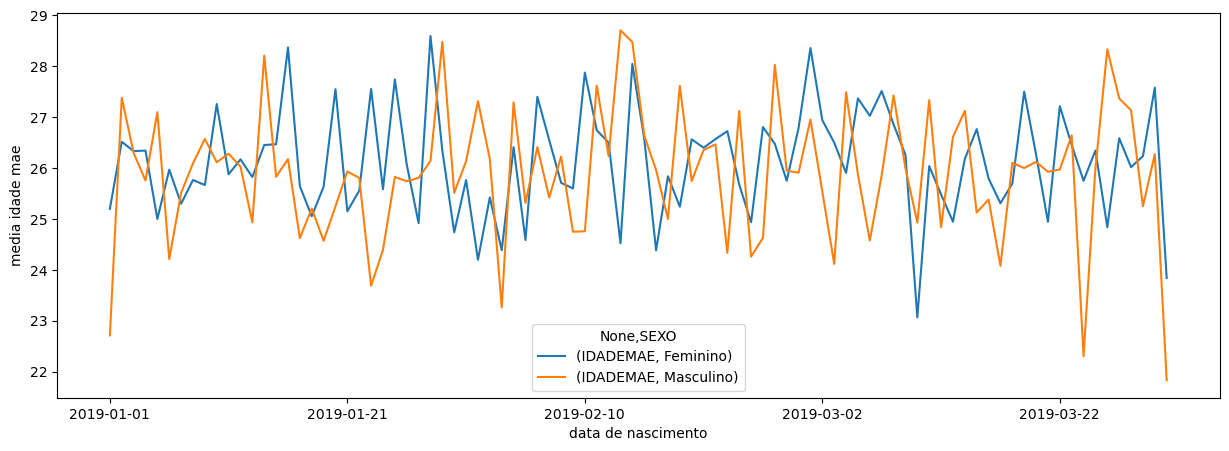

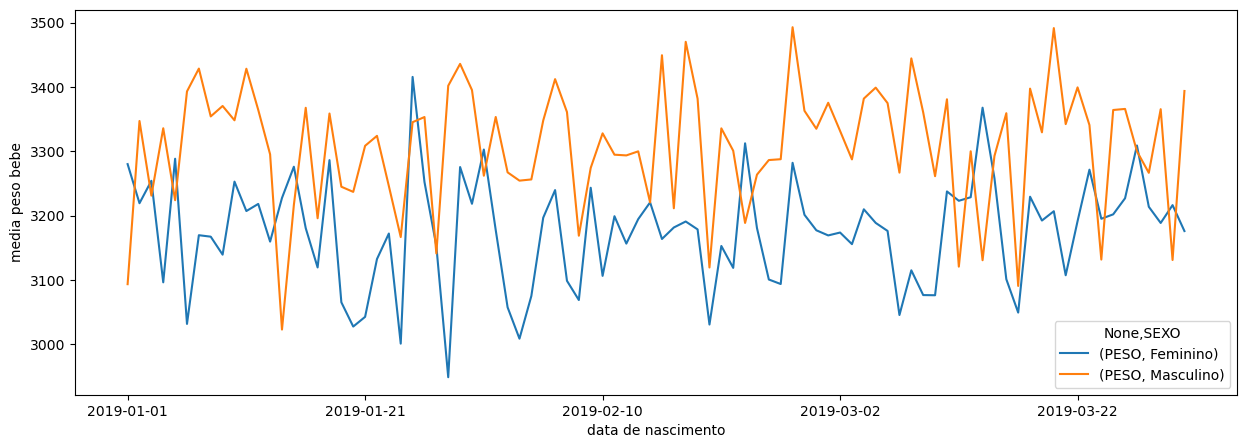

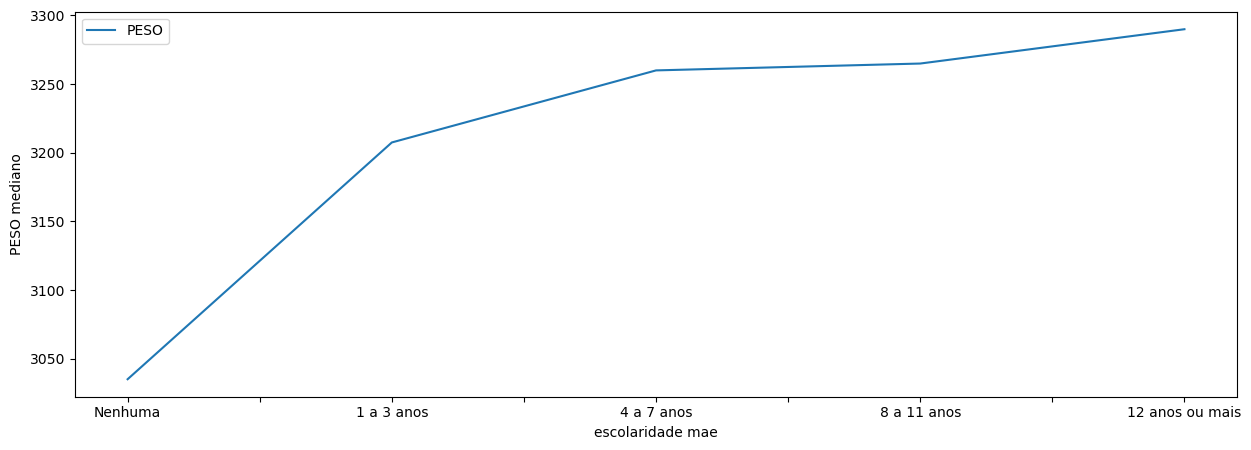

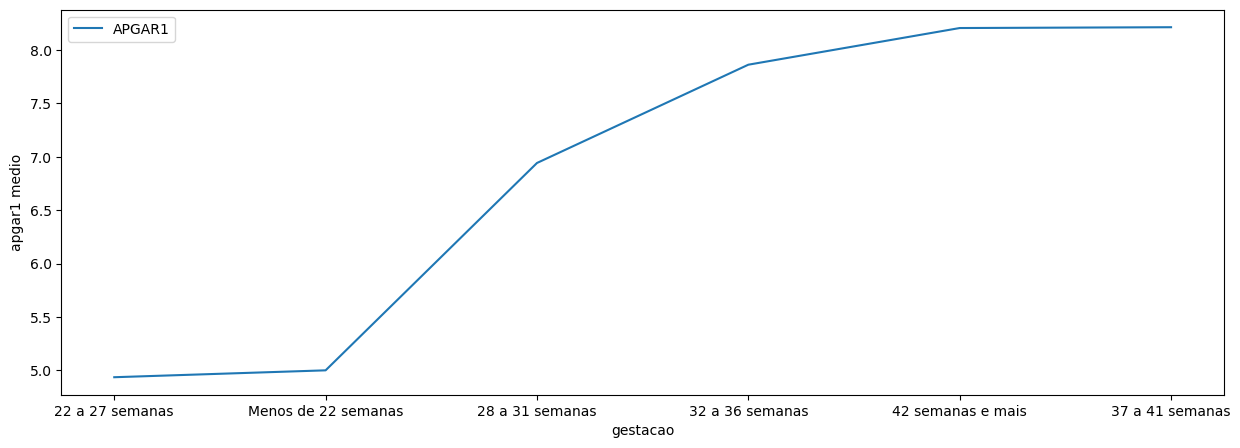

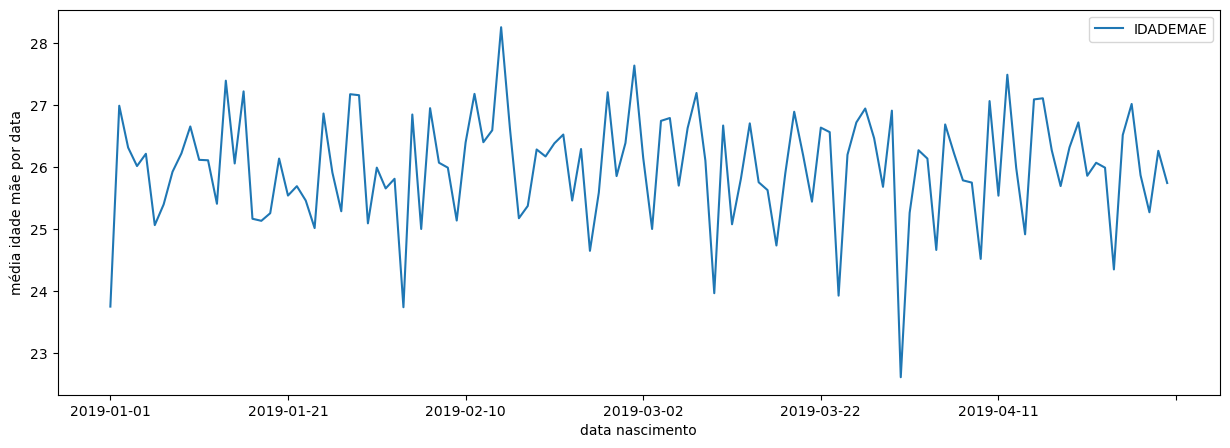

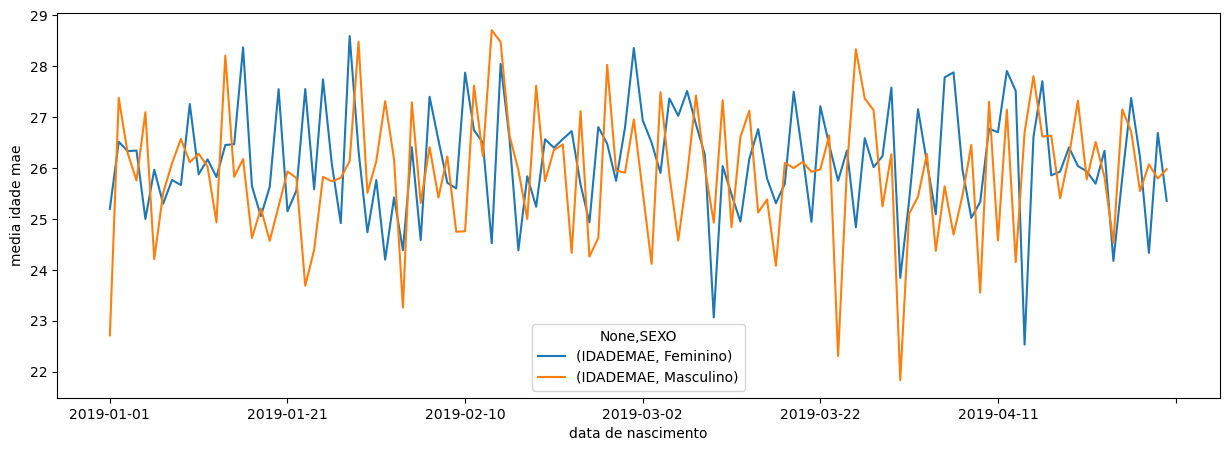

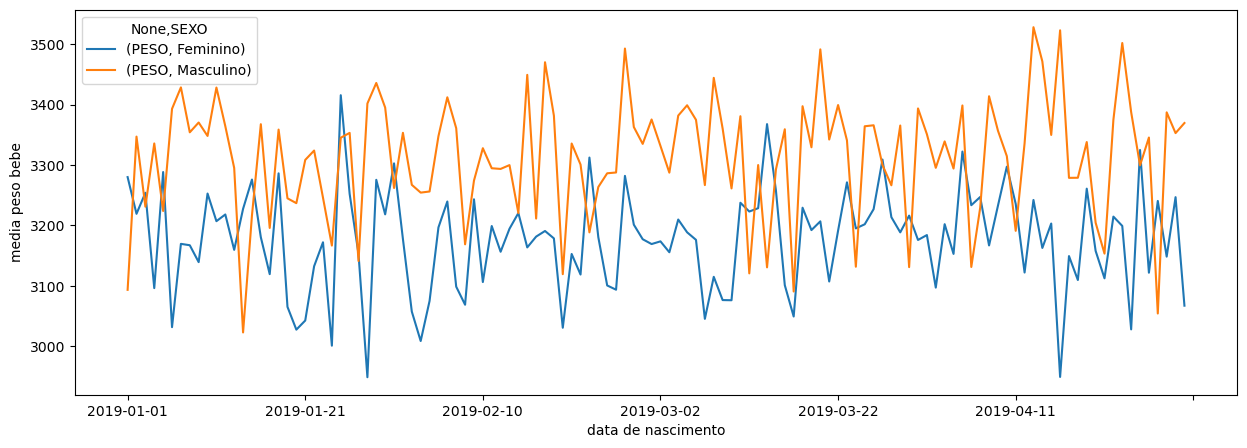

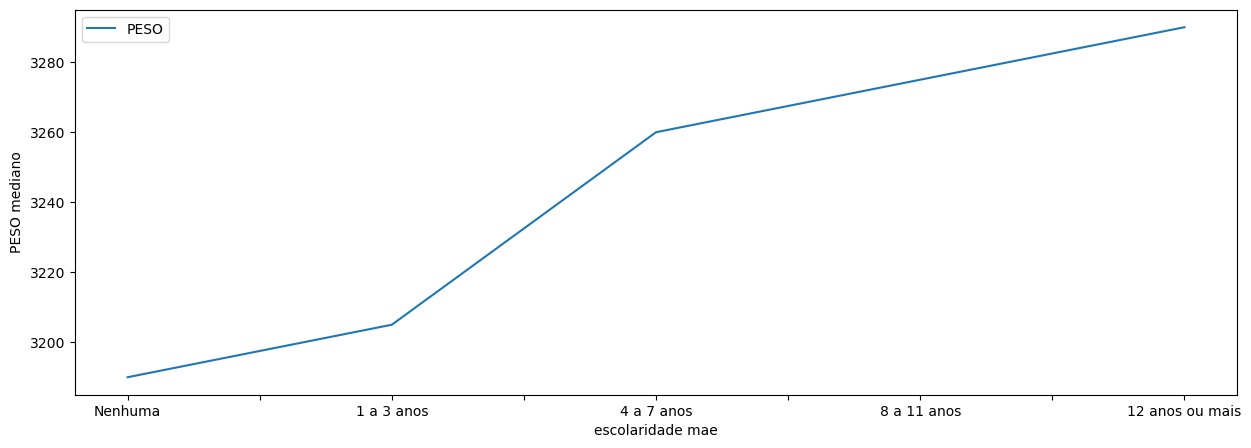

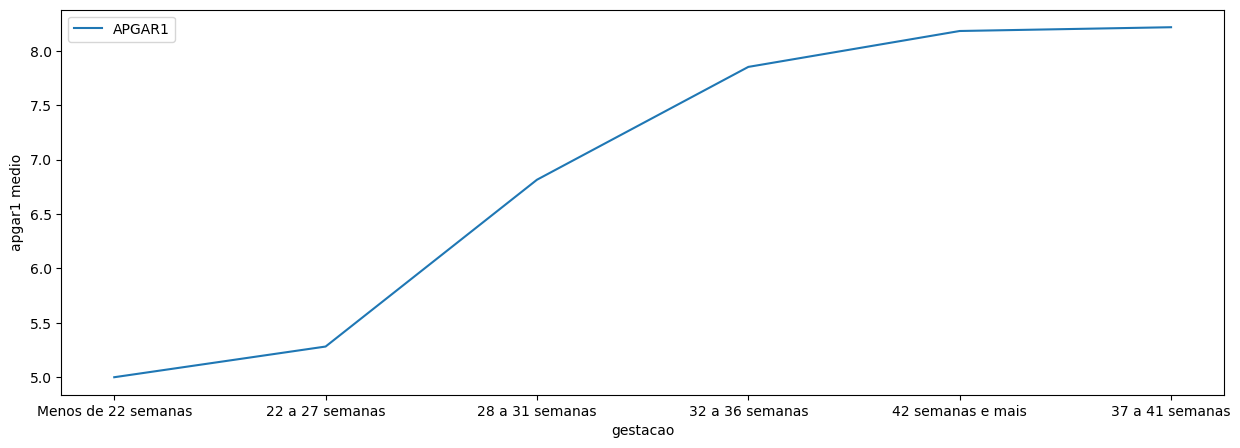

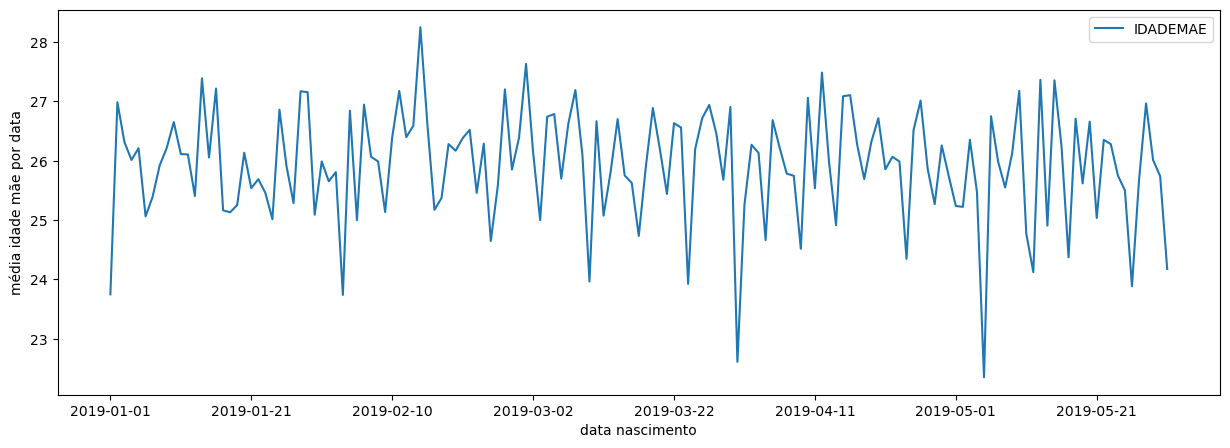

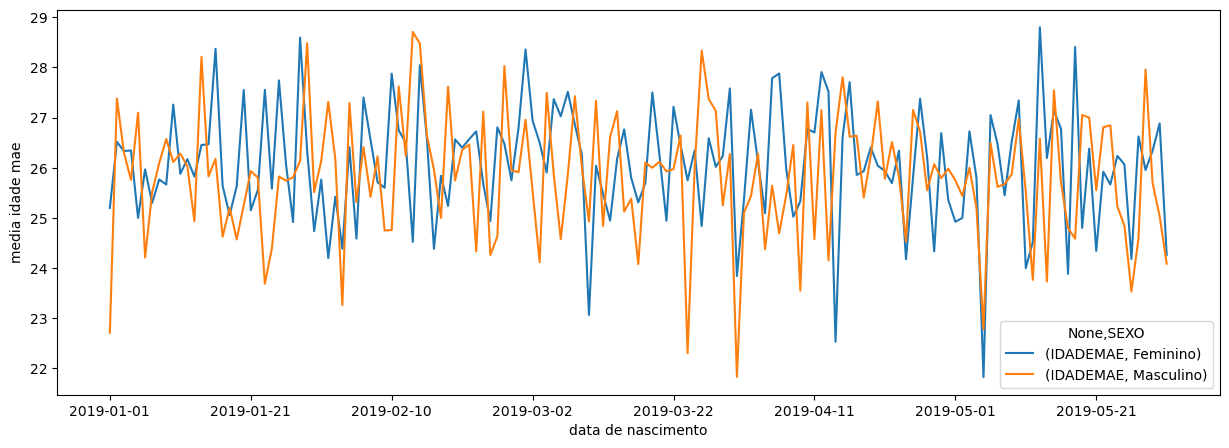

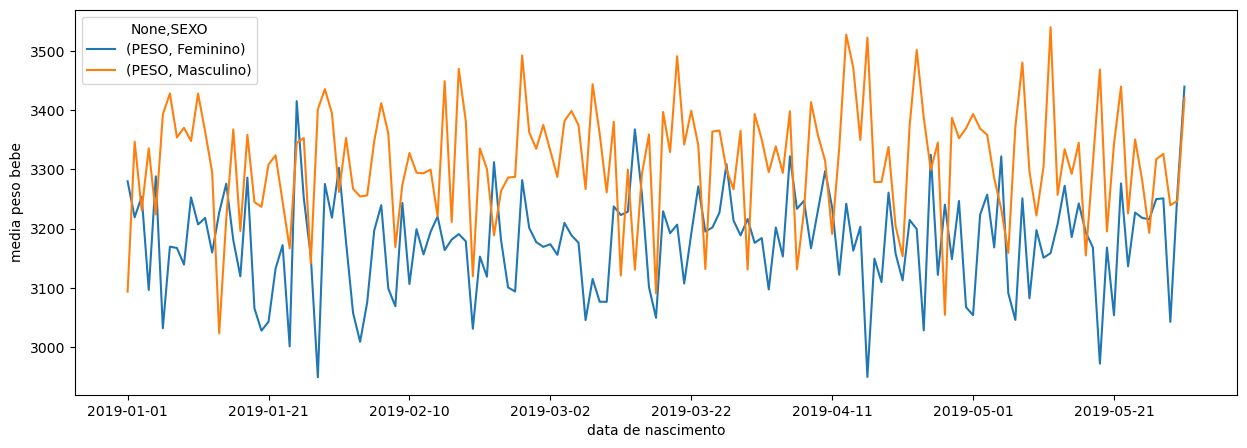

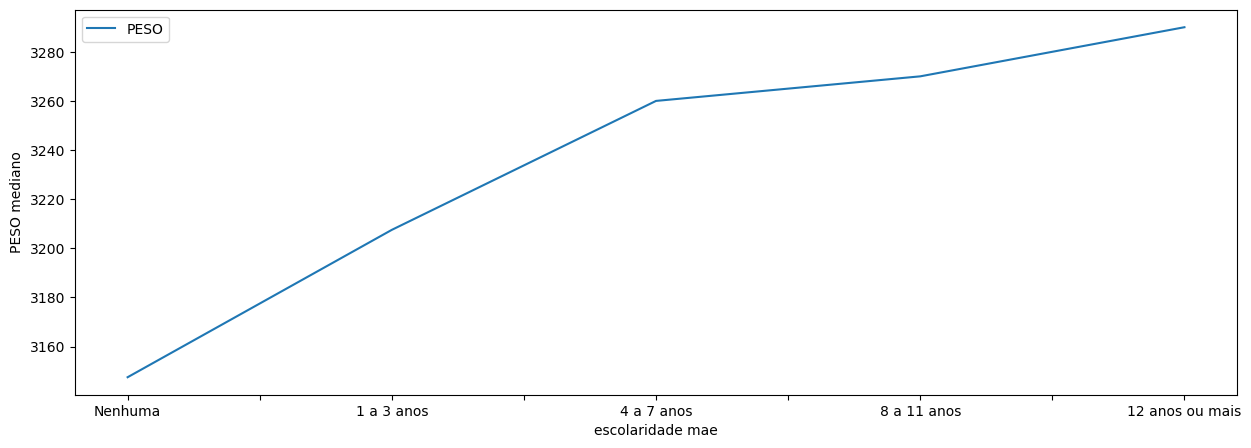

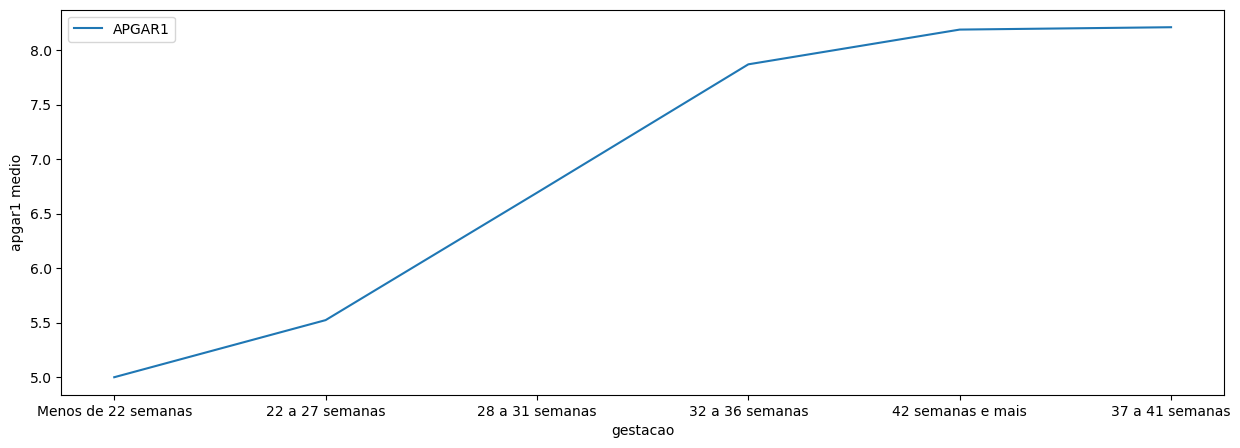

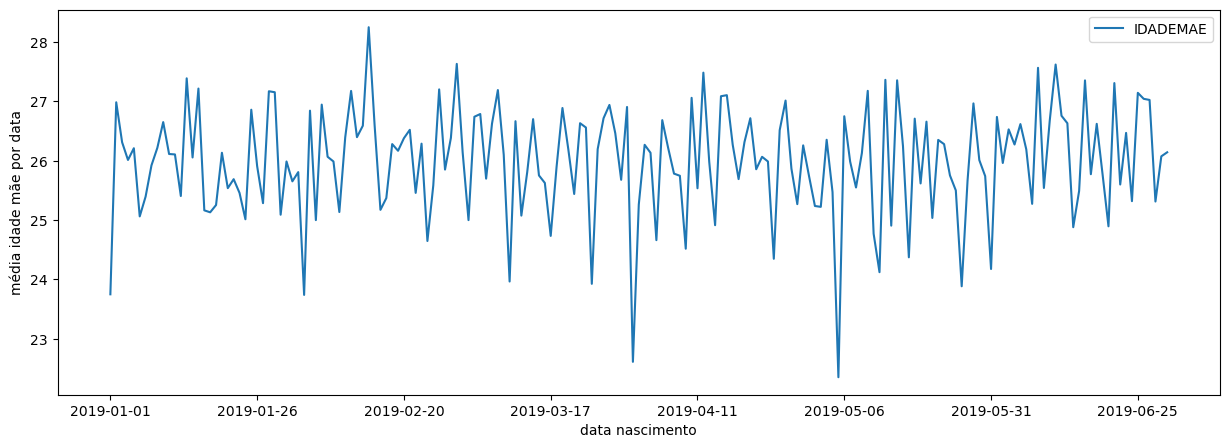

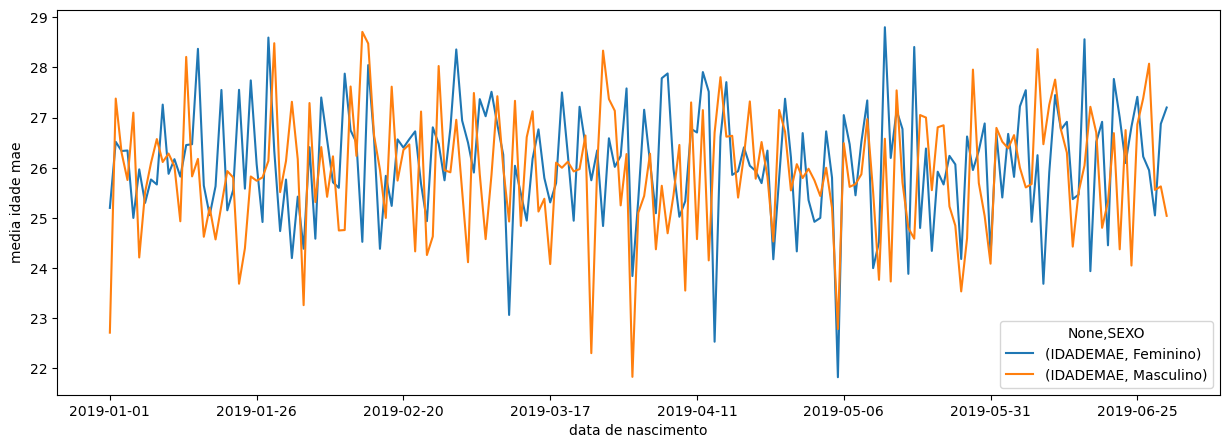

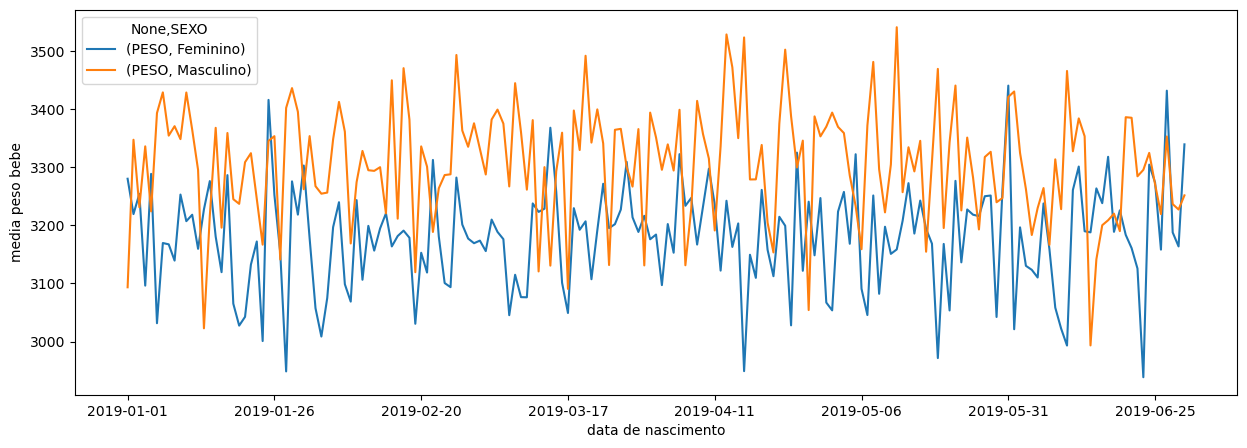

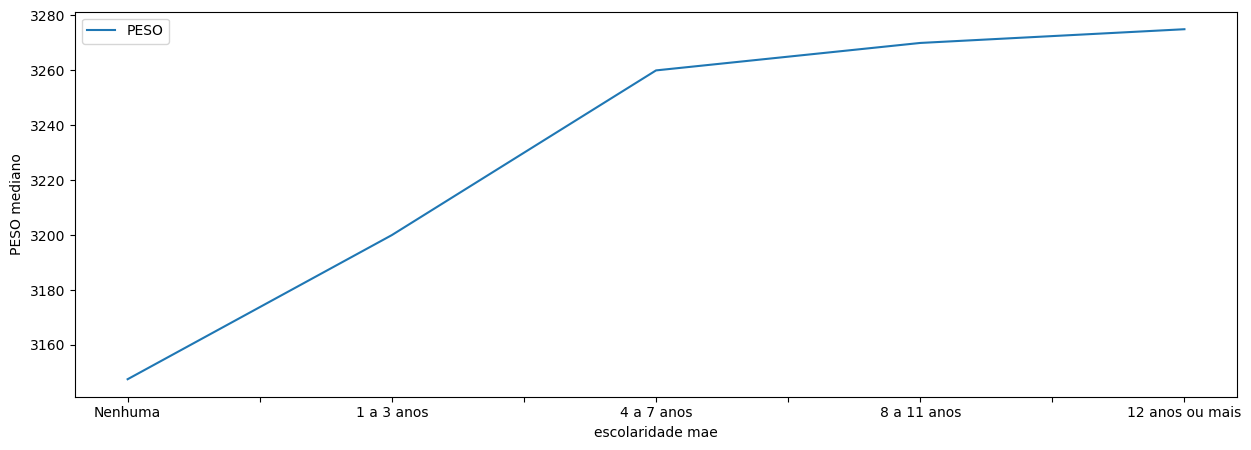

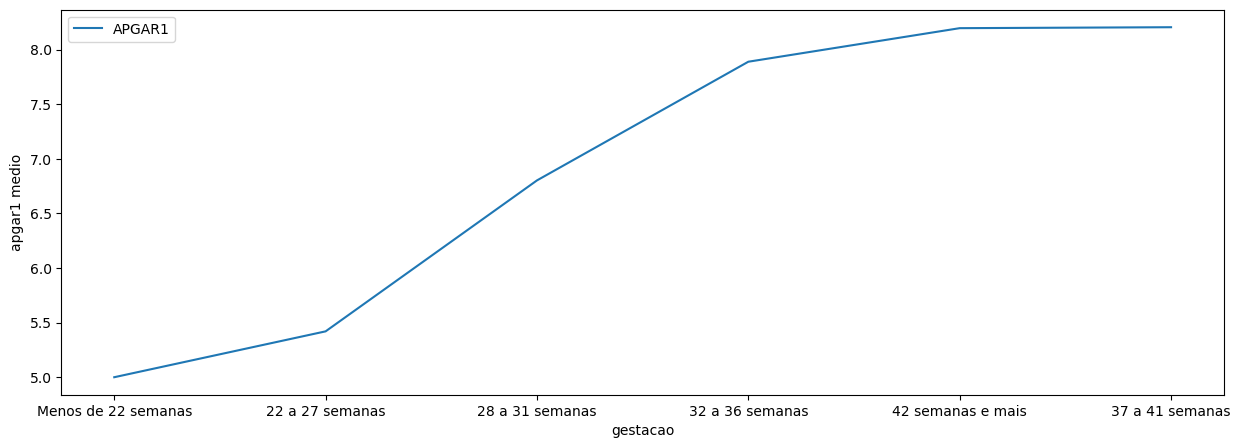

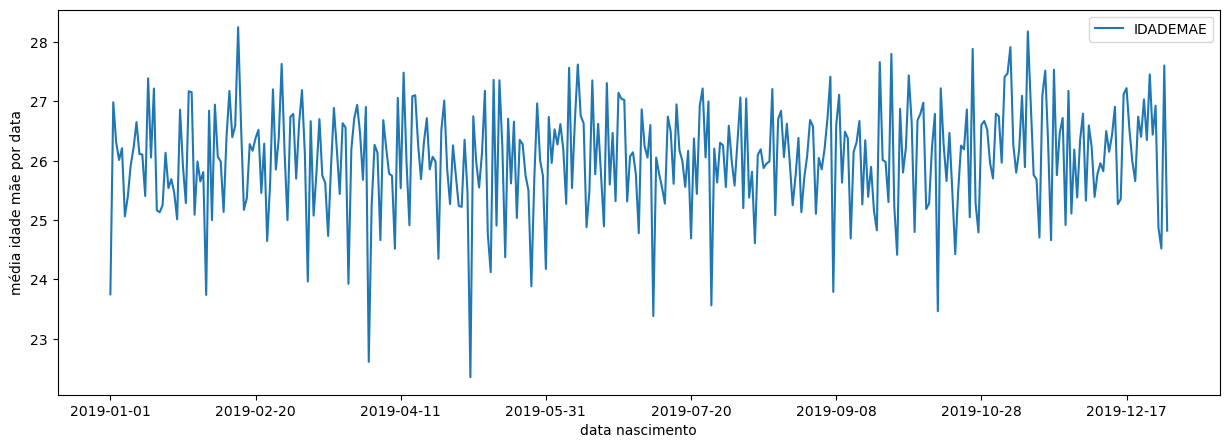

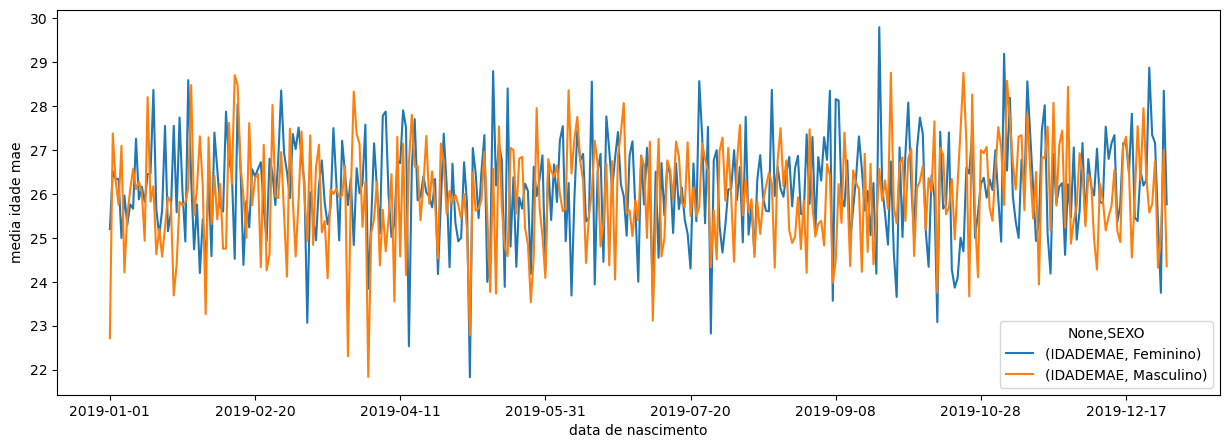

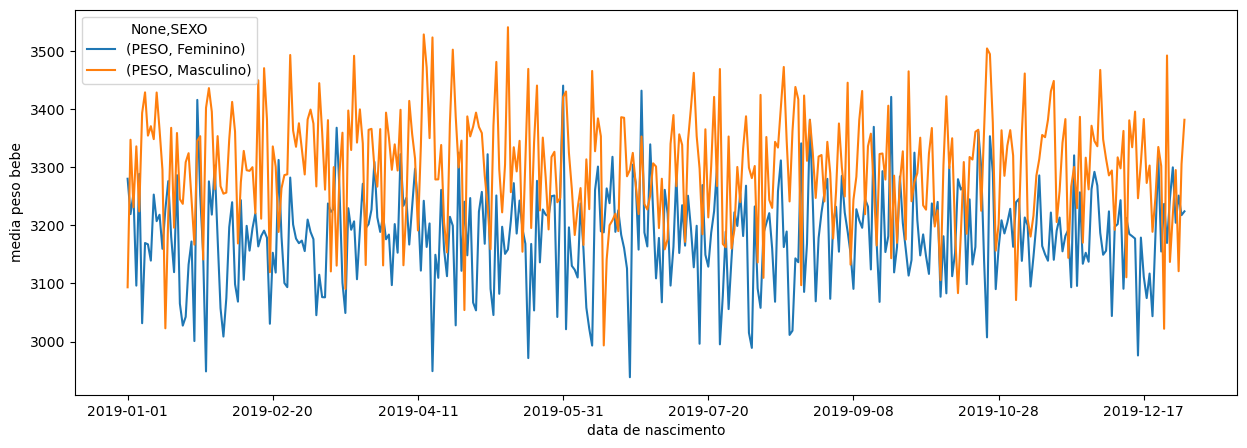

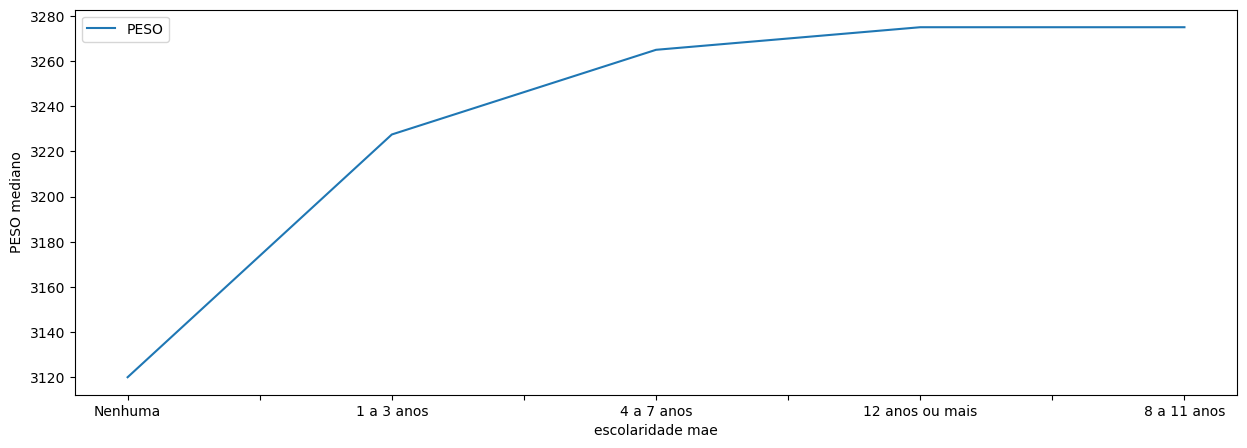

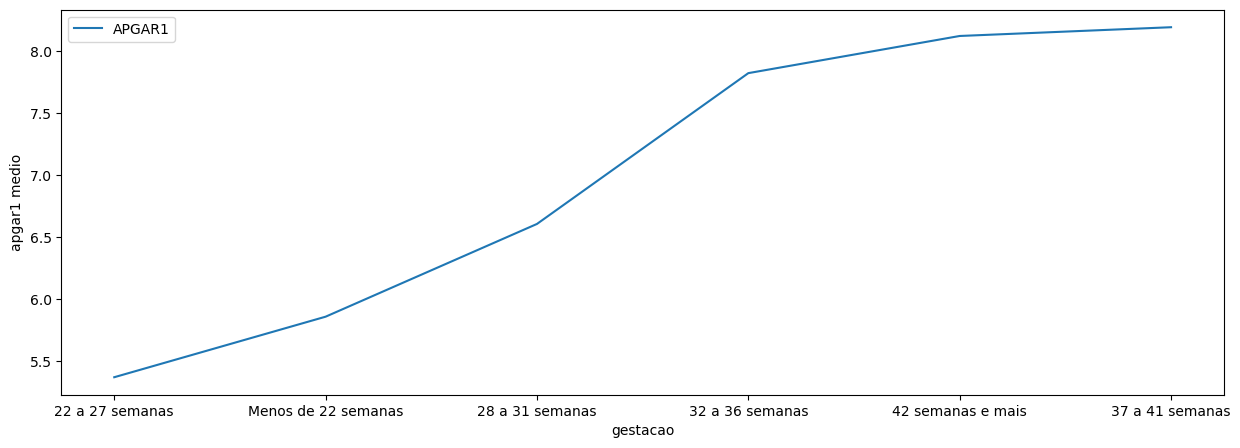

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

def plota_pt(df, value, index, func, ylabel, xlabel, opcao='nada'):
    if opcao == 'nada':
        pd.pivot_table(df, values=value, index=index, aggfunc=func).plot(figsize=[15,5])
    elif opcao == 'unstack':
        pd.pivot_table(df, values=value, index=index, aggfunc=func).unstack().plot(figsize=[15,5])
    elif opcao == 'sort':
        pd.pivot_table(df, values=value, index=index, aggfunc=func).sort_values(value).plot(figsize=[15,5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

raiz = '/Users/tsumano/Documents/Cursos/EBAC/Cientista de Dados/Modulo_14'
output_dir = f'{raiz}/output/figs'

meses = ['MAR', 'ABR', 'MAI', 'JUN', 'DEZ']

for mes in meses:
    sinasc = pd.read_csv(f'{raiz}/input/SINASC_RO_2019_{mes}.csv')
       
    max_data = sinasc.DTNASC.max()[:7]
    os.makedirs(f'{output_dir}/{max_data}', exist_ok=True)
    
    plota_pt(sinasc, 'IDADEMAE', 'DTNASC', 'mean', 'média idade mãe por data', 'data nascimento')
    plt.savefig(f'{output_dir}/{max_data}/media_idade_mae_por_data.png')
    
    plota_pt(sinasc, 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean', 'media idade mae','data de nascimento','unstack')
    plt.savefig(f'{output_dir}/{max_data}/media idade mae por sexo.png')

    plota_pt(sinasc, 'PESO', ['DTNASC', 'SEXO'], 'mean', 'media peso bebe','data de nascimento','unstack')
    plt.savefig(f'{output_dir}/{max_data}/media peso bebe por sexo.png')

    plota_pt(sinasc, 'PESO', 'ESCMAE', 'median', 'PESO mediano','escolaridade mae','sort')
    plt.savefig(f'{output_dir}/{max_data}/PESO mediano por escolaridade mae.png')

    plota_pt(sinasc, 'APGAR1', 'GESTACAO', 'mean', 'apgar1 medio','gestacao','sort')
    plt.savefig(f'{output_dir}/{max_data}/media apgar1 por gestacao.png')

##### Para deixar o código mais automatizado, poderia gerar um executável para facilitar a execução e gerar os arquivos. 
##### Além disso, poderia implementar a opção de usar links para baixar as informações diretamente da fonte. 
##### Outra abordagem seria permitir que o usuário entre com o ano e o mês desejados durante a execução para gerar os gráficos correspondentes.
##### Também poderia criar funções para ler os arquivos, gerar e salvar os gráficos..